In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import re
from scipy.optimize import curve_fit, minimize

C:\Users\andr\AppData\Roaming\Python\Python310\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.2
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [ ]:
df = pd.read_csv("src/co_2_series.csv", sep=";", comment="#")

In [ ]:

df['T'] = df['t'].apply(lambda s: re.match("(-?\d\d?):(\d\d(.\d+)?)", s).groups())

In [ ]:
df['s'] = df['T'].apply(lambda t: int(t[0])*60 + float(t[1]))

(array([ 5.5577442 , -8.25733272]), array([0.00758704, 3.09412502]))

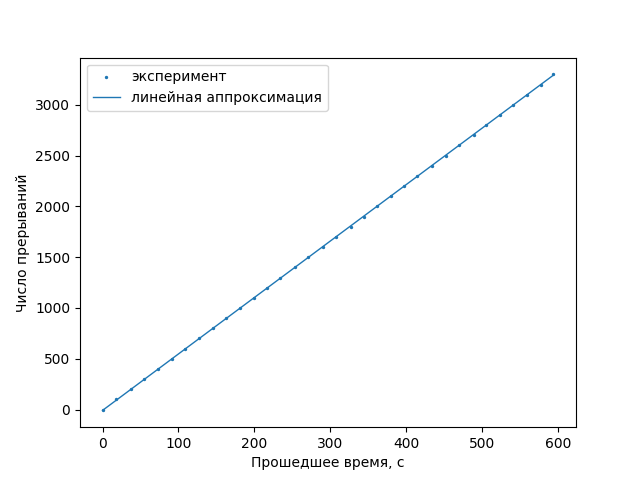

In [13]:
%matplotlib widget

plt.scatter(df['s'], np.arange(0, len(df['s'])) * 100, s=2, label="эксперимент")

f = lambda x, a, b: a*x + b
res, err = curve_fit(f, df['s'][10:],  np.arange(10, len(df['s'])) * 100, maxfev=10_000)

plt.plot(df['s'], f(df['s'], *res), lw=1, label="линейная аппроксимация")
plt.ylabel("Число прерываний")
plt.xlabel("Прошедшее время, с")
plt.legend()
plt.savefig("CO2.png", dpi=300)

res, np.sqrt(np.diag(err))

In [ ]:
5.5577442 # 2ν = N/t = 2/T; T = 2/(2ν)
2/5.5577442

0.35985823169047615

0.05063291139240506 308.48333333333335 443.0
0.10126582278481013 571.919014084507 658.0
1.0046511627906978


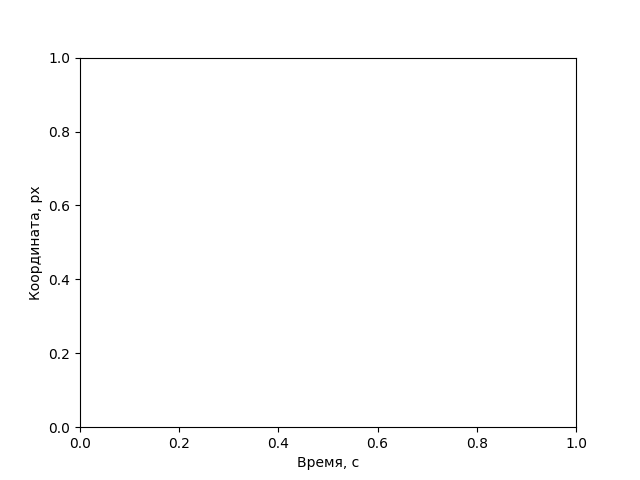

0.37823834196891193 339.3958333333333 409.0
0.17487046632124353 587.3029827315542 647.0
0.5336134453781513


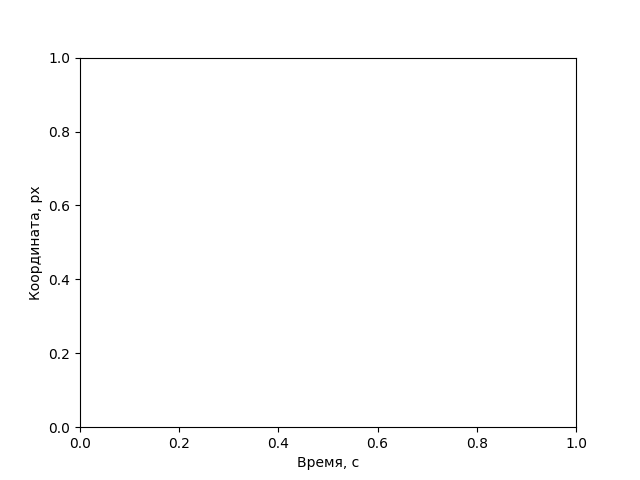

0.1774891774891775 397.5157894736842 467.0
0.12987012987012986 619.5398009950248 674.0
0.6086956521739131


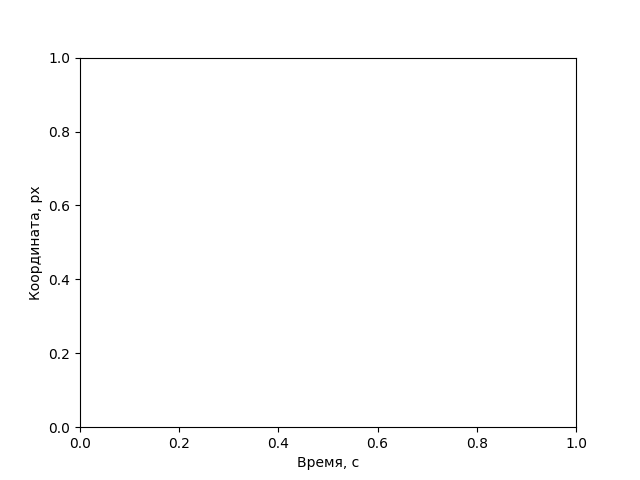

0.0738255033557047 384.286231884058 502.0
0.20469798657718122 615.9388185654009 704.0
1.0247524752475248


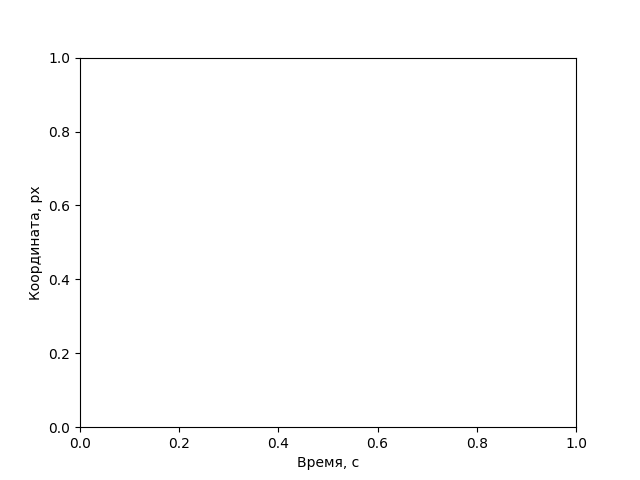

0.04830917874396135 394.83756345177665 551.0
0.10305958132045089 642.4973070017953 750.0
1.4371859296482412


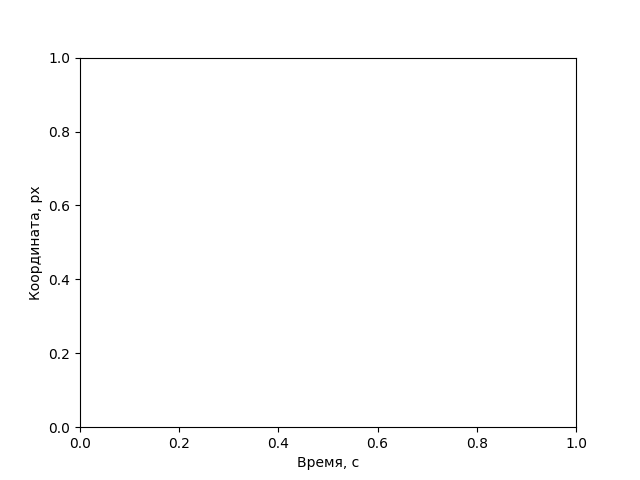

0.05063291139240506 308.48333333333335 443.0
0.10126582278481013 571.919014084507 658.0
1.0046511627906978


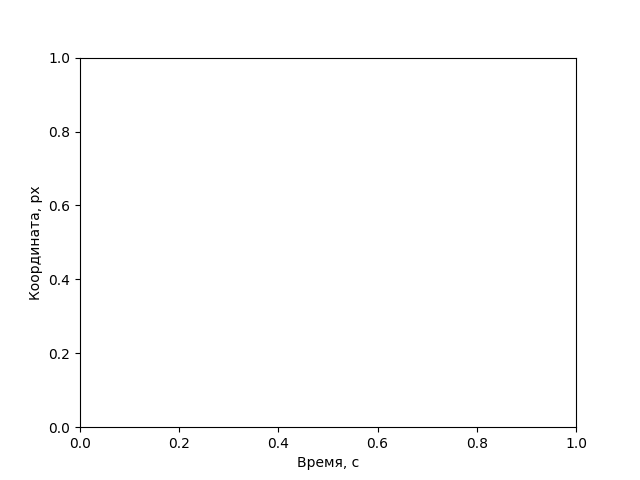

In [11]:
coords = []
for i in range(5542, 5548):
    bott = pd.read_csv(f"src/air_amp/IMG_{i}_bottom.csv", sep=";", comment="#")
    top = pd.read_csv(f"src/air_amp/IMG_{i}_top.csv", sep=";", comment="#")
    coords.append((bott, top))

def count_none(arr):
    return ((arr!=arr).sum(axis=0)/arr.size)[0]

def count_cross(arr, c):
    arr_n = arr - c
    return ((arr_n[:-1] * arr_n[1:]) < 0).sum()

fps = 30
time = []
amps = []

%matplotlib widget
for n, i in enumerate(coords):
    
    bott = np.array(i[0]).flatten()
    top = np.array(i[1]).flatten()
    bott_n = bott[~np.isnan(bott)]
    top_n = top[~np.isnan(top)]
    
    print(count_none(i[0]), np.average(bott_n), np.max(bott_n))
    print(count_none(i[1]), np.average(top_n), np.max(top_n))
    print((np.max(top_n) - np.min(top_n))/(np.max(top_n) - np.max(bott_n)))

    time.append(2*(200/fps)/(count_cross(top[:200][~np.isnan(top[:200])], np.average(top[:200][~np.isnan(top[:200])]))))
     # per 200 frames => *(200/fps)/crosses · 2 → T
    amps.append((np.max(top_n) - np.min(top_n))/(np.max(top_n) - np.max(bott_n)))
    
    plt.figure()
    #plt.plot(np.arange(len(i[0]))/fps, i[0])
    #plt.plot(np.arange(len(i[0]))/fps, i[1])
    plt.xlabel("Время, с")
    plt.ylabel("Координата, px")
    plt.savefig(f"images_src/{n}.png")
    plt.show()

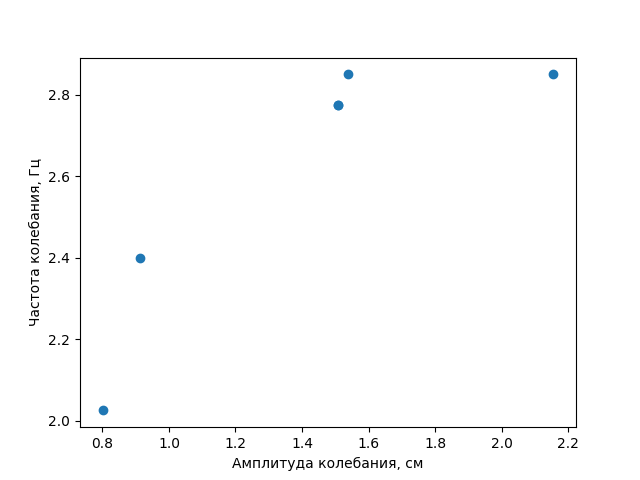

In [14]:
%matplotlib widget
#/2*2.4*1.2
plt.scatter(np.array(amps)*3/2, 1/np.array(time))
plt.xlabel("Амплитуда колебания, см")
plt.ylabel("Частота колебания, Гц")
plt.savefig(f"images_src/final_graph.png")
plt.show()

In [ ]:
count_cross(np.array([-1, 1, -2]), 0)

In [ ]:
1/0.367

In [ ]:
np.array(i[0]).flatten()

In [ ]:
len(bott)